Dataset shape: (98619, 15)

Eerste 5 rijen:

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619

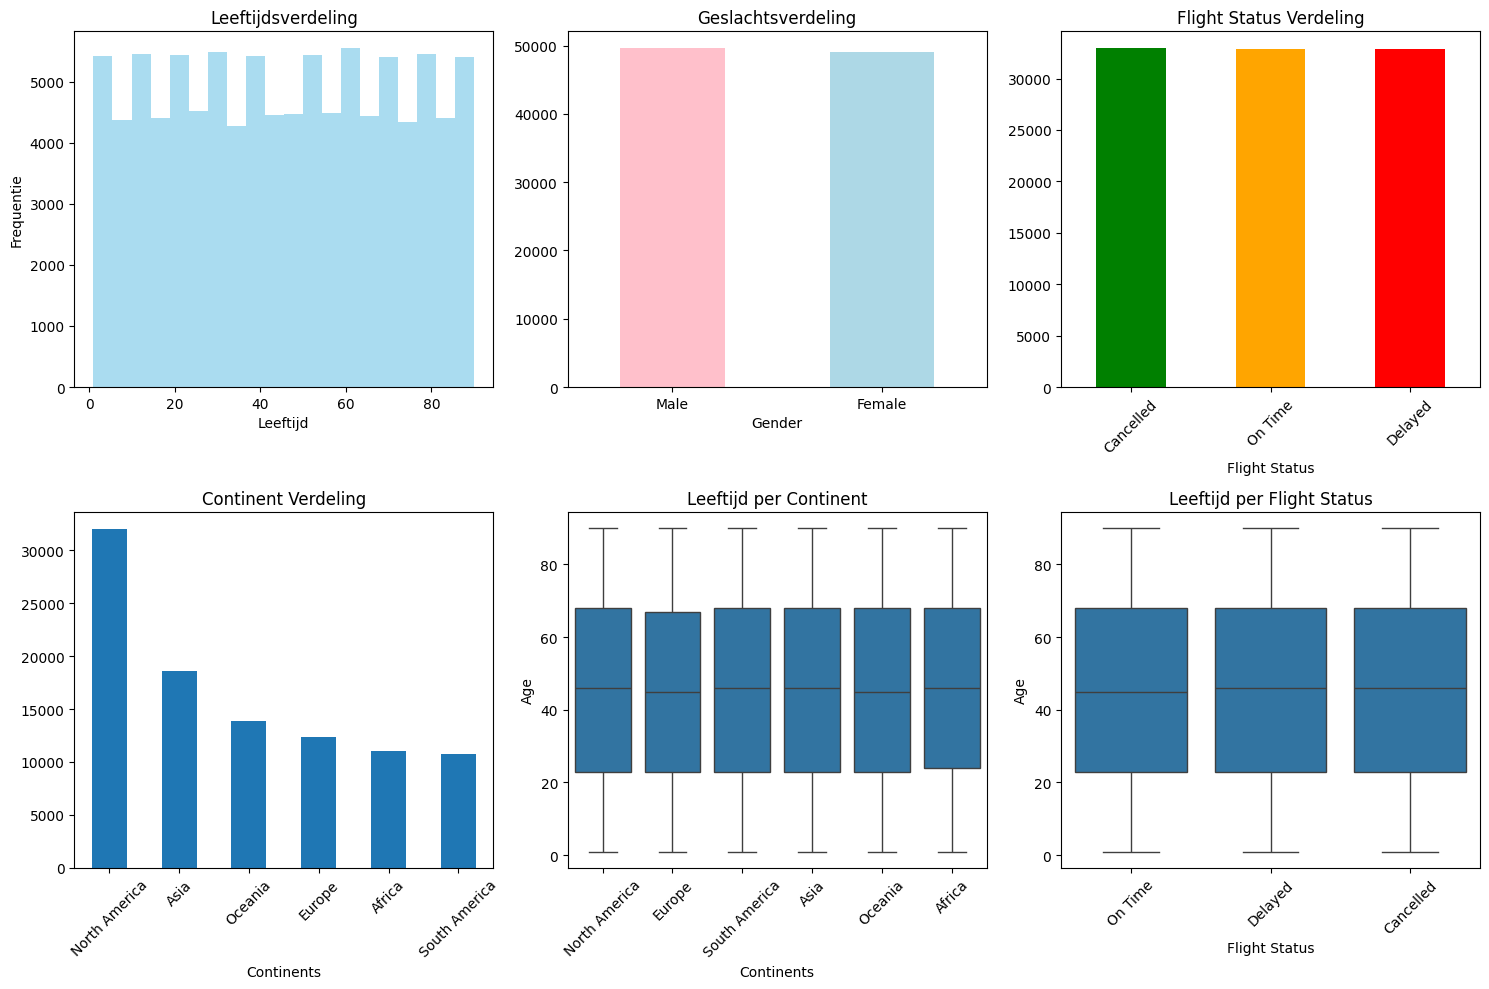


Genormaliseerde data:
        Age  Gender_encoded  Continent_encoded  Flight_Status_encoded
0  0.636180       -1.005868           0.321698               1.225547
1  0.636180        0.994166           0.321698               1.225547
2  0.829009        0.994166          -0.347660               1.225547
3  0.983273       -1.005868           0.321698               0.001192
4 -0.945017        0.994166           0.321698               1.225547

Genormaliseerde data statistieken:
                Age  Gender_encoded  Continent_encoded  Flight_Status_encoded
count  9.861900e+04    9.861900e+04       9.861900e+04           9.861900e+04
mean  -1.018056e-16   -9.169171e-17       1.205024e-17          -2.806319e-17
std    1.000005e+00    1.000005e+00       1.000005e+00           1.000005e+00
min   -1.716333e+00   -1.005868e+00      -1.686377e+00          -1.223163e+00
25%   -8.678853e-01   -1.005868e+00      -1.017018e+00          -1.223163e+00
50%    1.912784e-02    9.941662e-01       3.216985e-0

In [4]:
# Airlines Clustering Oefening - Simpel

# preparation
## Importeren van libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Inladen en tonen data
data = pd.read_csv('../Datasets/airlines.csv')
data = data.dropna()  # als we unknown data willen verwijderen
# data.drop(columns=['column_name'])  # indien we een kolom willen verwijderen
print(data.head())
print(data.describe())
print(type(data))

## Data preparation
# Target - Wat we willen voorspellen
y = data['Flight Status']  # gewoon een kolom die we willen voorspellen
# Predictors - waarmee we dat gaan voorspellen
X = data[['Age', 'Gender']]

# Gender naar numeriek omzetten
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})

## Exploring the data
print(y.info())
print(X.info())
print(y.head())
print(X.head())
print(y.describe())
print(X.describe())

## (OPTIONEEL) normaliseren dataset
# Hier gaan we met Z-scores werken om de uitschieters weg te werken
# Z-score is hoeveel standaardafwijkingen ze van het gemiddelde afzitten
# Z-score van 1 is 1 standaardafwijking van het gemiddelde
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)  # Zal van alle features de Z-score nemen

# Model Selection
## Initialise the model
# Kunnen deze gewoon zo initialiseren
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=42)
# Of als we met genormaliseerde data werken kunnen we een pipeline gebruiken
kmeans_pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=42))

## model trainen
# We zullen een model trainen en meteen de clusters hieruit halen
clusters = kmeans.fit_predict(X_scaled)
# Of we kunnen dit van de pipeline
clusters_pipeline = kmeans_pipeline.fit_predict(X)

## Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

## Compare clusters to original data
compare = pd.DataFrame({'Original': y, 'Clusters': clusters})
print(compare.head(10))

## Visualise the clusters
# als we enkel de punten van de clusters willen plotten
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=clusters)
plt.xlabel('Age (normalized)')
plt.ylabel('Gender (encoded)')
plt.title('Simple Cluster Plot')
plt.show()

# Als we een dataframe hebben en deze volledig willen plotten
plt.figure(figsize=(8,6))
# Plot the points and color the cluster
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=labels, palette="viridis", s=100, alpha=0.6, edgecolor="k")
# plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Age (normalized)')
plt.ylabel('Gender (encoded)')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

# Cluster resultaten bekijken
print("\nCluster verdeling:")
unique, counts = np.unique(clusters, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} passagiers")